In [5]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import expected_returns
from pypfopt import risk_models

import pandas_datareader.data as web
import datetime as dt

from pypfopt import plotting
from pypfopt import cla

import data.fmp

# Retrieve Price Data of Individual Stocks

In [4]:
symbols = ['FB', 'JNJ', 'DIS', 'T', 'O', 'PG']

START_DATE = dt.datetime(1970, 1, 1)
END_DATE = dt.datetime.today()

df = web.DataReader(symbols, 'yahoo', START_DATE, END_DATE)['Adj Close']
df.dropna(inplace=True)
df.head(10)

C:\Users\eshin\anaconda3\lib\site-packages\pandas_datareader\base.py:272: SymbolWarning: Failed to read symbol: 'FB', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
C:\Users\eshin\anaconda3\lib\site-packages\pandas_datareader\base.py:272: SymbolWarning: Failed to read symbol: 'JNJ', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
C:\Users\eshin\anaconda3\lib\site-packages\pandas_datareader\base.py:272: SymbolWarning: Failed to read symbol: 'DIS', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
C:\Users\eshin\anaconda3\lib\site-packages\pandas_datareader\base.py:272: SymbolWarning: Failed to read symbol: 'T', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
C:\Users\eshin\anaconda3\lib\site-packages\pandas_datareader\base.py:272: SymbolWarning: Failed to read symbol: 'O', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
C:\Users\eshin\anaconda3\lib\site-packages\pandas_datareader\base.py:2

RemoteDataError: No data fetched using 'YahooDailyReader'

# Compute Mean and Covariance

In [11]:
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

mu

Symbols
FB     0.304931
JNJ    0.145917
DIS    0.169973
T      0.052405
O      0.139810
PG     0.144341
dtype: float64

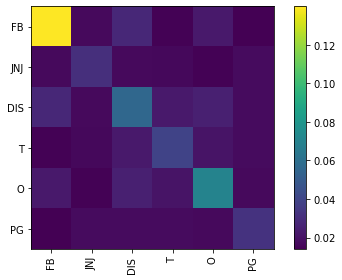

<AxesSubplot:>

In [12]:
plotting.plot_covariance(S)

# Max Sharpe Portfolio

OrderedDict([('FB', 0.2495), ('JNJ', 0.29163), ('DIS', 0.13573), ('T', 0.0), ('O', 0.02867), ('PG', 0.29447)])


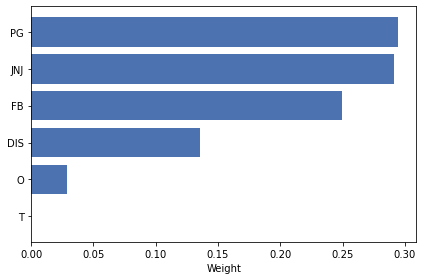

<AxesSubplot:xlabel='Weight'>

In [16]:
maxSharpe = EfficientFrontier(mu, S)

maxSharpe.max_sharpe()

maxSharpe_weights = maxSharpe.clean_weights()

print(maxSharpe_weights)

plotting.plot_weights(maxSharpe_weights)

In [17]:
maxSharpe_result = maxSharpe.portfolio_performance(verbose=True)

Expected annual return: 18.8%
Annual volatility: 16.9%
Sharpe Ratio: 0.99


# Min Volatility Portfolio

OrderedDict([('FB', 0.04), ('JNJ', 0.34199), ('DIS', 0.06332), ('T', 0.18326), ('O', 0.07892), ('PG', 0.29252)])


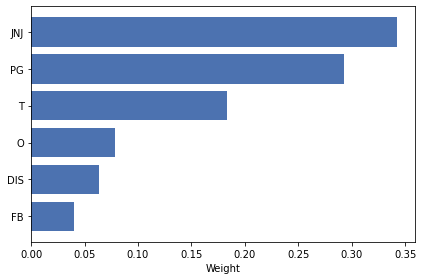

<AxesSubplot:xlabel='Weight'>

In [22]:
minVol = EfficientFrontier(mu,S)

minVol.min_volatility()

minVol_weights = minVol.clean_weights()

print(minVol_weights)

plotting.plot_weights(minVol_weights)

In [23]:
minVol_result = minVol.portfolio_performance(verbose=True)

Expected annual return: 13.6%
Annual volatility: 14.8%
Sharpe Ratio: 0.78


# Max Quadratic Utility Portfolio

OrderedDict([('FB', 1.0), ('JNJ', 0.0), ('DIS', 0.0), ('T', 0.0), ('O', 0.0), ('PG', 0.0)])


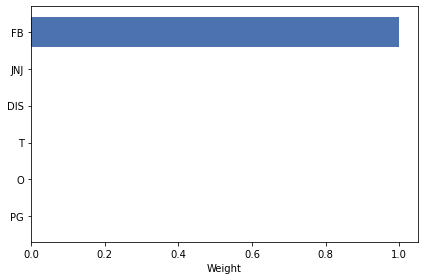

<AxesSubplot:xlabel='Weight'>

In [30]:
maxQuadraticUtility = EfficientFrontier(mu,S)

maxQuadraticUtility.max_quadratic_utility()

maxQuadraticUtility_weights = maxQuadraticUtility.clean_weights()

print(maxQuadraticUtility_weights)

plotting.plot_weights(maxQuadraticUtility_weights)

In [31]:
maxQuadraticUtility_result = maxQuadraticUtility.portfolio_performance(verbose=True)

Expected annual return: 30.5%
Annual volatility: 37.4%
Sharpe Ratio: 0.76


In [24]:
#-------------------------------------------------
# OPTIMIZED PORTFOLIO IN CLA OBJECT FOR PLOTTING
#-------------------------------------------------

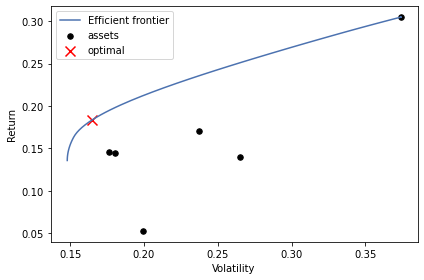

<AxesSubplot:xlabel='Volatility', ylabel='Return'>

In [26]:
# Efficient Frontier for Maximum Sharpe Portfolio
maxSharpeCLA = cla.CLA(mu,S)
maxSharpeCLA.max_sharpe()
plotting.plot_efficient_frontier(maxSharpeCLA, show_assets=True)

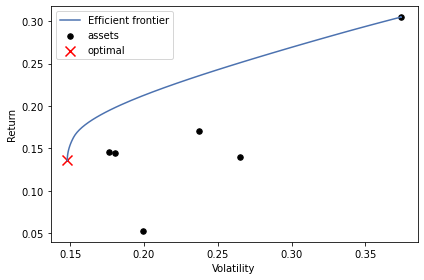

<AxesSubplot:xlabel='Volatility', ylabel='Return'>

In [27]:
# Efficient Frontier for Minimum Volatility Portfolio
minVolCLA = cla.CLA(mu,S)
minVolCLA.min_volatility()
plotting.plot_efficient_frontier(minVolCLA, show_assets=True)

In [ ]:
#-------------------------------------------------
# PERFORMANCE COMPARISON
#-------------------------------------------------

In [33]:
import pandas as pd

performance = pd.DataFrame(columns=['Portfolio', 'Expected Return', 'Annual Volatility', 'Sharpe Ratio'])

In [34]:
data = {'Portfolio': 'Max Sharpe', 
        'Expected Return': maxSharpe_result[0], 
        'Annual Volatility': maxSharpe_result[1], 
        'Sharpe Ratio': maxSharpe_result[2]}

performance = performance.append(data, ignore_index=True)

In [35]:
data = {'Portfolio': 'Min Volatility', 
        'Expected Return': minVol_result[0], 
        'Annual Volatility': minVol_result[1], 
        'Sharpe Ratio': minVol_result[2]}

performance = performance.append(data, ignore_index=True)

In [36]:
data = {'Portfolio': 'Max Quadratic Utility', 
        'Expected Return': maxQuadraticUtility_result[0], 
        'Annual Volatility': maxQuadraticUtility_result[1], 
        'Sharpe Ratio': maxQuadraticUtility_result[2]}

performance = performance.append(data, ignore_index=True)

In [38]:
performance.set_index('Portfolio')

,Expected Return,Annual Volatility,Sharpe Ratio
Portfolio,,,
Max Sharpe,0.188216,0.169346,0.993330
Min Volatility,0.135720,0.148085,0.781444
Max Quadratic Utility,0.304931,0.373980,0.761887
